In [1]:
import sys
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import msprime
import demes
import demesdraw

In [ ]:
#Read in empirical stats
sdf=pd.read_csv("empirical_inference/empirical_summary_stats/10kb_wins.stats", header=0, sep='\t')

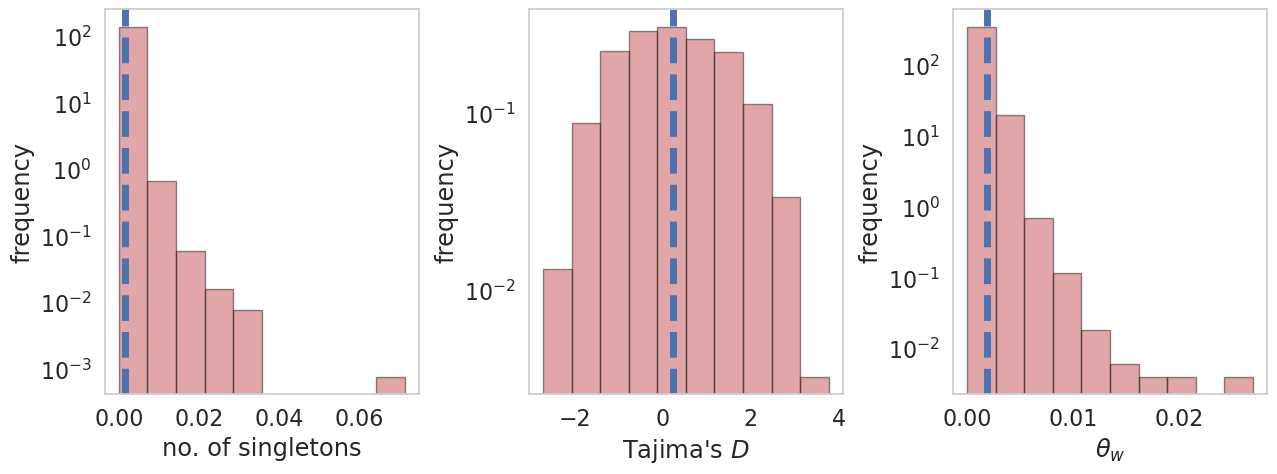

In [15]:
#PLOT DISTRIBUTION OF EMPIRICAL SUMMARY STATS, AND MEAN OF BEST FIT
param=1154
#Create empty df to store concatenated replicates
rdf = pd.DataFrame()
#Loop through replicates
for i in range(1, 101):
    try:
        #Load in stats for given replicate and concatenate with rdf
        df = pd.read_csv(r"empirical_inference/simulated_summary_stats/bestFit/"+str(param)+"_rep" + str(i) + "_chimeric.stats", sep='\t', header=0)
        for stat in ['nhaps', 'numexternalmutations', 'numpoly', 'numsingletons', 'thetah', 'thetal', 'thetapi', 'thetaw']:
            df[stat] = df[stat] / 10000
        rdf = pd.concat([rdf,df])
    except Exception:
        pass
    
rdf = rdf.reset_index(drop=True)

titles = ['no. of singletons', r"Tajima's $D$", r'$\theta_w$']

sns.set(rc={'figure.figsize':(15, 5),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.45)
for i,stat in enumerate(['numsingletons', 'tajimasd', 'thetaw']):
    plt.subplot(1,3,i+1)
    counts, bins = np.histogram(sdf[stat].dropna())
    plt.hist(bins[:-1], bins, weights=counts, alpha=0.5, edgecolor='k', linewidth=1, color='r', density=True, label='empirical')
    counts, bins = np.histogram(rdf[stat].dropna())
    plt.axvline(rdf[stat].mean(), color='b', linestyle='--', linewidth=5, label='inferred mean') 
    plt.yscale('log')
    plt.xlabel(titles[i])
    plt.ylabel('frequency')
    #plt.title(titles[i])
    if(stat=='numpoly'):
        plt.legend()
plt.subplots_adjust(wspace=0.35, hspace=0.3)
#plt.suptitle(r"$N_{ancestral}$ = 61,198; $N_{bottleneck}$ = 0.293; $T$ = 0.0287; $N_{current}$ = 33,830", y=1)
#plt.savefig('/home/vivak/chimerism/plots/fig3a-c.pdf', format='pdf', bbox_inches='tight', dpi=300)

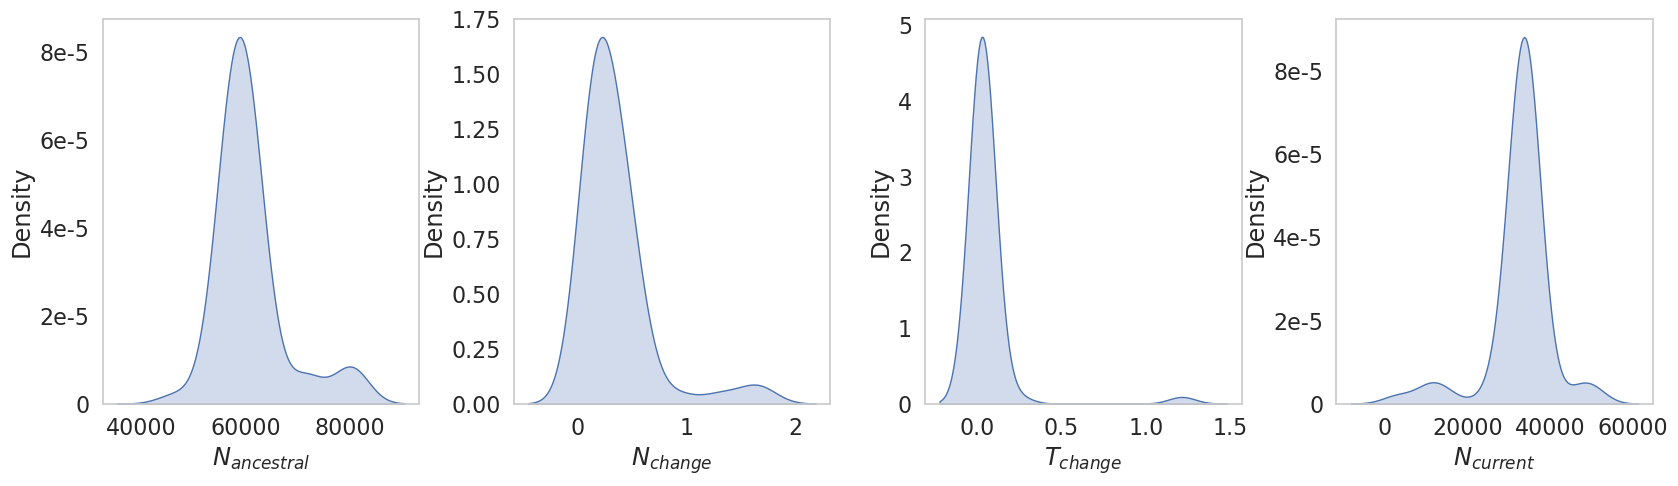

In [11]:
#PLOT POSTERIOR DISTRIBUTIONS
df = pd.read_csv(r"empirical_inference/ABC/posteriors.txt", header=0, sep='\t')
sns.set(rc={'figure.figsize':(20, 5),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1.45)
titles = [r"$N_{ancestral}$", r"$N_{change}$", r"$T_{change}$", r"$N_{current}$"]
for i,j in enumerate(['Nanc','Nbot','T','Ncurr']):
    plt.subplot(1,4,i+1)
    sns.kdeplot(np.array(df[j]), fill=True, bw_method=0.5)
    if(j=='Nanc'):
        plt.yticks([0, 2e-5, 4e-5, 6e-5, 8e-5],['0', '2e-5', '4e-5', '6e-5', '8e-5'])

    elif(j=='Ncurr'):
        plt.yticks([0, 2e-5, 4e-5, 6e-5, 8e-5],['0', '2e-5', '4e-5', '6e-5', '8e-5'])
    plt.xlabel(titles[i])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
#plt.savefig('/home/vivak/chimerism/plots/fig3e-h.pdf', format='pdf', bbox_inches='tight', dpi=300)

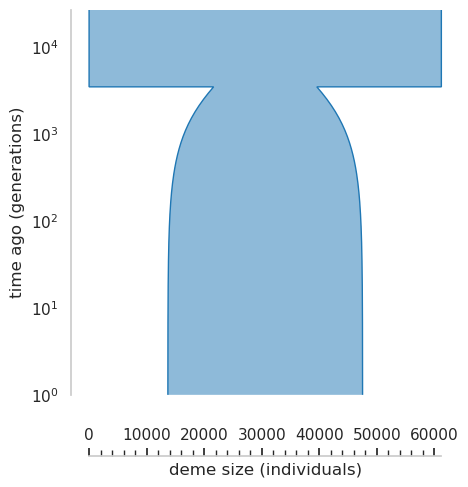

In [25]:
#PLOT DEMOG MODEL
N_anc = 61198
N_bot = N_anc * 0.293
T_bot = N_anc * 2 * 0.0287
N_curr = 33830
r = (N_curr/N_bot)**(1/T_bot)-1    

demography = msprime.Demography()
demography.add_population(
    name="marmoset",
    description="marmoset population",
    initial_size=N_curr,
    growth_rate=r,
    default_sampling_time=0, 
    initially_active=True,
)

#Add events
demography.add_population_parameters_change(initial_size=N_anc, time=T_bot, growth_rate=0, population="marmoset")
demography.sort_events

sns.set(rc={'figure.figsize':(5,5),'axes.facecolor':'white','axes.edgecolor': '.8'},font_scale=1)
graph = msprime.Demography.to_demes(demography)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
ax = demesdraw.tubes(graph, ax=ax, seed=1, log_time=True, labels=None, scale_bar=True)
plt.savefig(r"/home/vivak/chimerism/plots/fig3d.pdf", format="pdf", dpi=300)